In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-44.88326139291281 25.97662107498303
-84.26147138666725 7.095147740530734
-17.39517599212111 -86.36460960670216
25.56486765909071 -19.833698562158702
-28.871293779101876 -127.17326934740962
32.43890050275709 71.64995547271127
-18.15934363465503 -133.9352953071069
47.913659081972156 -54.85304743919977
-84.84647843869371 -172.27952485270117
44.46109997167687 11.45857808949998
-24.212618352239474 127.58661153809464
24.95915429189222 162.43123314808173
-17.90652151307306 177.59157069968506
63.67950687773626 42.59636016101621
38.02554242794392 -136.3822728353124
-32.830445636938556 -34.6267498000978
9.519828451538018 122.07485748337695
83.79323325442672 116.52085664108535
70.17344377784275 -75.06859328463288
57.447029758371286 -134.98381833940016
58.05863983335712 -132.0779117371751
-83.29235065726745 -139.42488393394828
46.179305501778515 18.203896896018477
-3.926334401463521 -49.83192859528427
-35.324296520665385 71.80172103583888
-44.280574202093995 -177.36923905111098
-71.08069028657332

60.40123561898724 154.193251448769
0.4170965020471016 2.815104924775653
24.420422495758004 -161.59763260503257
40.77622395068161 -142.05363989851656
-42.60442142279767 -12.931686453140713
-9.812679179538321 -25.324351716819677
-12.561775672257355 -118.0925820475345
46.8328610959166 76.62417013919247
13.709807799055312 137.8327838047171
-74.48728040028357 -43.890335963099915
60.25080378583502 17.25650560975825
-77.81316770135155 -159.68677886986924
82.23798884152887 69.19031161118122
16.292098926325608 145.0759053905213
47.59847666618569 -87.49063253743817
-18.36653610782031 -151.37559991417697
-89.13680730765978 63.869547668268126
89.04712295751764 -140.94286045833277
69.51973514067654 164.3983744745512
-70.90257215724756 -12.401209427914921
-77.75351666141903 39.29111807199894
84.19004647682189 120.3587955215404
36.34539465219751 64.47788364066011
-63.57346160356619 147.31494159479826
44.59150705362097 -164.4220010323915
-17.919466454132802 153.54456559992315
-42.20683098174595 -179.8

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | lima
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kundian
Processing Record 7 of Set 1 | marystown
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | castenaso
Processing Record 10 of Set 1 | yulara
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | bereznik
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | cayhagan
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | juneau
Processing Record 21 of Set 1 | komlo
Processing Record 22 of Set 1 | tucurui
Processing Record 23 of Set 1 | mahebourg

Processing Record 37 of Set 4 | amderma
City not found. Skipping...
Processing Record 38 of Set 4 | arraias
Processing Record 39 of Set 4 | mayor pablo lagerenza
Processing Record 40 of Set 4 | pedro juan caballero
Processing Record 41 of Set 4 | beloha
Processing Record 42 of Set 4 | kudahuvadhoo
Processing Record 43 of Set 4 | nabire
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | arlit
Processing Record 46 of Set 4 | la ronge
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | pitimbu
Processing Record 49 of Set 4 | ossora
Processing Record 50 of Set 4 | ucar
Processing Record 1 of Set 5 | alofi
Processing Record 2 of Set 5 | tiruvottiyur
City not found. Skipping...
Processing Record 3 of Set 5 | atasu
Processing Record 4 of Set 5 | salta
Processing Record 5 of Set 5 | kosh-agach
Processing Record 6 of Set 5 | kavieng
Processing Record 7 of Set 5 | tefe
Processing Record 8 of Set 5 | sisimiut
Processing Record 9 of Set 5 | sibu
Processing

Processing Record 24 of Set 8 | bontang
Processing Record 25 of Set 8 | tuktoyaktuk
Processing Record 26 of Set 8 | morondava
Processing Record 27 of Set 8 | palmital
Processing Record 28 of Set 8 | solnechnyy
Processing Record 29 of Set 8 | shingu
Processing Record 30 of Set 8 | otradnoye
Processing Record 31 of Set 8 | qandahar
City not found. Skipping...
Processing Record 32 of Set 8 | santa marta
Processing Record 33 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 34 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 35 of Set 8 | nacala
Processing Record 36 of Set 8 | atar
Processing Record 37 of Set 8 | karamea
City not found. Skipping...
Processing Record 38 of Set 8 | north bend
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | amot
Processing Record 41 of Set 8 | araouane
Processing Record 42 of Set 8 | shebalino
Processing Record 43 of Set 8 | edremit
Processing Record 44 of Set 8 | bambanglipuro
Processing Record 45 

City not found. Skipping...
Processing Record 12 of Set 12 | naftah
City not found. Skipping...
Processing Record 13 of Set 12 | machali
Processing Record 14 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 12 | galeras
Processing Record 16 of Set 12 | cabo san lucas
Processing Record 17 of Set 12 | gwadar
Processing Record 18 of Set 12 | ambulu
Processing Record 19 of Set 12 | alexandria
Processing Record 20 of Set 12 | thinadhoo
Processing Record 21 of Set 12 | san angelo
Processing Record 22 of Set 12 | skjervoy
Processing Record 23 of Set 12 | yeppoon
Processing Record 24 of Set 12 | nanakuli
Processing Record 25 of Set 12 | mbandaka
Processing Record 26 of Set 12 | merauke
Processing Record 27 of Set 12 | bukama
Processing Record 28 of Set 12 | pattaya
Processing Record 29 of Set 12 | xining
Processing Record 30 of Set 12 | haikou
Processing Record 31 of Set 12 | mumford
Processing Record 32 of Set 12 | rozhyshche
Processing Record 33 of Set 12 | di

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,56.43,61,8,5.95,ZA,2022-08-03 03:52:30
1,Hermanus,-34.4187,19.2345,50.81,86,12,1.90,ZA,2022-08-03 03:52:30
2,Lima,-12.0432,-77.0282,58.89,86,100,18.41,PE,2022-08-03 03:52:24
3,Los Llanos De Aridane,28.6585,-17.9182,67.75,83,75,17.27,ES,2022-08-03 03:52:31
4,Rikitea,-23.1203,-134.9692,72.52,71,57,19.42,PF,2022-08-03 03:52:31
5,Kundian,32.4587,71.4775,87.13,63,94,7.05,PK,2022-08-03 03:52:31
6,Marystown,47.1666,-55.1483,66.85,100,99,8.30,CA,2022-08-03 03:52:32
7,Vaini,-21.2000,-175.2000,78.96,94,75,11.50,TO,2022-08-03 03:52:32
8,Castenaso,44.5089,11.4698,72.28,78,0,6.91,IT,2022-08-03 03:52:32
9,Yulara,-25.2406,130.9889,71.44,68,100,20.71,AU,2022-08-03 03:52:33


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2022-08-03 03:52:30,-34.0033,24.7314,56.43,61,8,5.95
1,Hermanus,ZA,2022-08-03 03:52:30,-34.4187,19.2345,50.81,86,12,1.90
2,Lima,PE,2022-08-03 03:52:24,-12.0432,-77.0282,58.89,86,100,18.41
3,Los Llanos De Aridane,ES,2022-08-03 03:52:31,28.6585,-17.9182,67.75,83,75,17.27
4,Rikitea,PF,2022-08-03 03:52:31,-23.1203,-134.9692,72.52,71,57,19.42
...,...,...,...,...,...,...,...,...,...
568,Gavle,SE,2022-08-03 04:07:44,60.6745,17.1417,58.37,83,98,3.00
569,Marquette,US,2022-08-03 04:09:39,46.5333,-87.6335,63.68,93,100,14.50
570,Tevaitoa,PF,2022-08-03 04:09:40,-16.7833,-151.5000,78.28,73,4,23.29
571,Dawlatabad,AF,2022-08-03 04:09:40,36.4141,64.9053,87.84,21,0,5.08


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

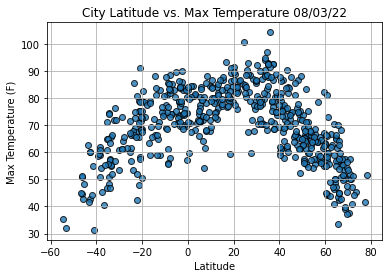

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


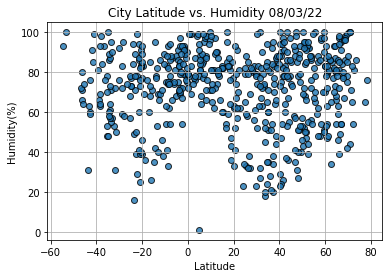

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

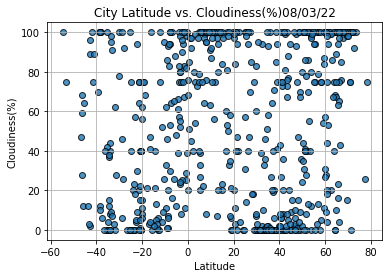

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

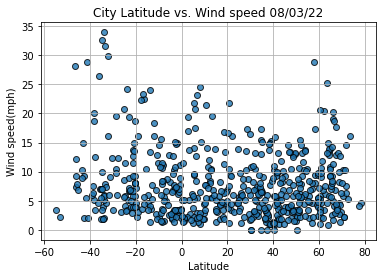

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed "+ time.strftime("%x"))
plt.ylabel("Wind speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data 
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                      Fortuna
Country                        US
Date          2022-08-03 03:52:34
Lat                       40.5982
Lng                     -124.1573
Max Temp                    61.36
Humidity                       90
Cloudiness                    100
Wind Speed                   5.75
Name: 13, dtype: object

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

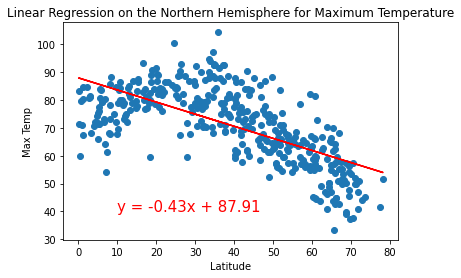

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

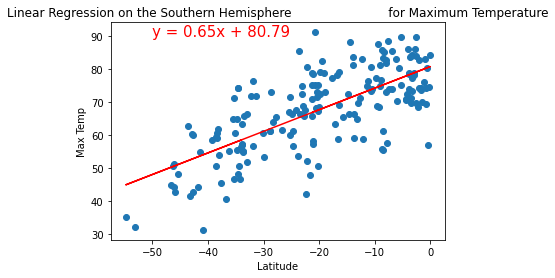

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

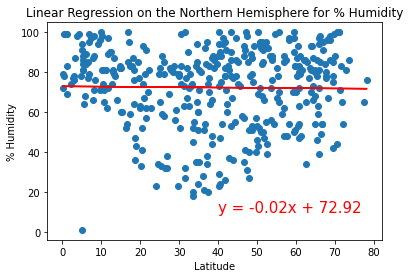

In [39]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

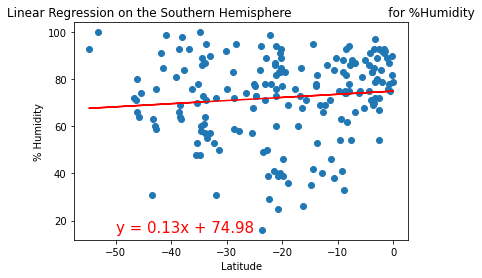

In [42]:
# Linear regression on the southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for %Humidity', '% Humidity',(-50,15))

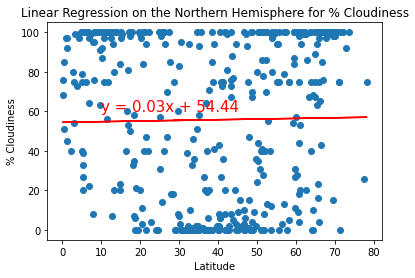

In [44]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))

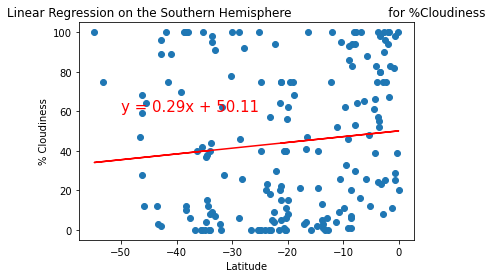

In [46]:
# Linear regression on the southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for %Cloudiness', '% Cloudiness',(-50,60))

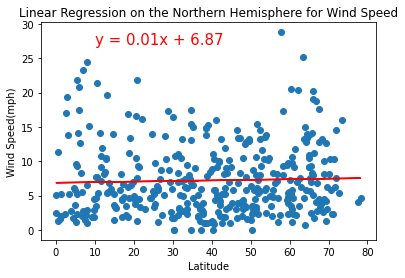

In [52]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed(mph)',(10,27))

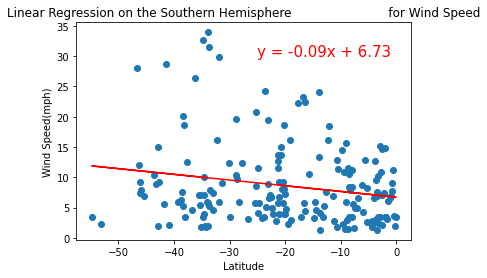

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed(mph)',(-25,30))